In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 바탕질환 데이터: df_DS

In [22]:
data = pd.read_csv('./(항생제) 환자 바탕질환 데이터/TB_YP_DS_D.csv')
df_DS = data.copy()

## 자료형 변환

In [3]:
df_DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458261 entries, 0 to 458260
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   VTHOS_NO      458261 non-null  object
 1   RGNO          458261 non-null  object
 2   ICD10CD       458261 non-null  object
 3   DIAG_NM       458261 non-null  object
 4   MAIN_DIAG_YN  458261 non-null  object
dtypes: object(5)
memory usage: 17.5+ MB


In [25]:
df_DS.MAIN_DIAG_YN.value_counts()

MAIN_DIAG_YN
N    352074
Y    106187
Name: count, dtype: int64

In [26]:
print(len(df_DS.ICD10CD.unique()))
print(len(df_DS.DIAG_NM.unique()))
print(len(df_DS.MAIN_DIAG_YN.unique()))

5691
10577
2


In [27]:
df_DS.ICD10CD = df_DS['ICD10CD'].astype('category')
df_DS.DIAG_NM = df_DS['DIAG_NM'].astype('category')
df_DS.MAIN_DIAG_YN = df_DS['MAIN_DIAG_YN'].astype('category')

In [28]:
df_DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458261 entries, 0 to 458260
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   VTHOS_NO      458261 non-null  object  
 1   RGNO          458261 non-null  object  
 2   ICD10CD       458261 non-null  category
 3   DIAG_NM       458261 non-null  category
 4   MAIN_DIAG_YN  458261 non-null  category
dtypes: category(3), object(2)
memory usage: 9.7+ MB


In [29]:
len(df_DS['RGNO'].unique())

69090

In [30]:
len(df_DS['VTHOS_NO'].unique())

106175

In [31]:
man = ['man' + str(x) for x in range(len(df_DS['VTHOS_NO'].unique()))]
manlist = dict(zip(df_DS['VTHOS_NO'].unique(), man))
df_DS['VTHOS_NO'] = df_DS['VTHOS_NO'].apply(lambda x: manlist.get(x, x))

In [32]:
rgno = ['no.' + str(x) for x in range(len(df_DS['RGNO'].unique()))]
rgno_list = dict(zip(df_DS['RGNO'].unique(), rgno))
df_DS['RGNO'] = df_DS['RGNO'].apply(lambda x: rgno_list.get(x, x))

In [56]:
df_DS.to_csv('./바탕질환 데이터 v1.csv', index = False)

## ICD10 코드 알아보기unique

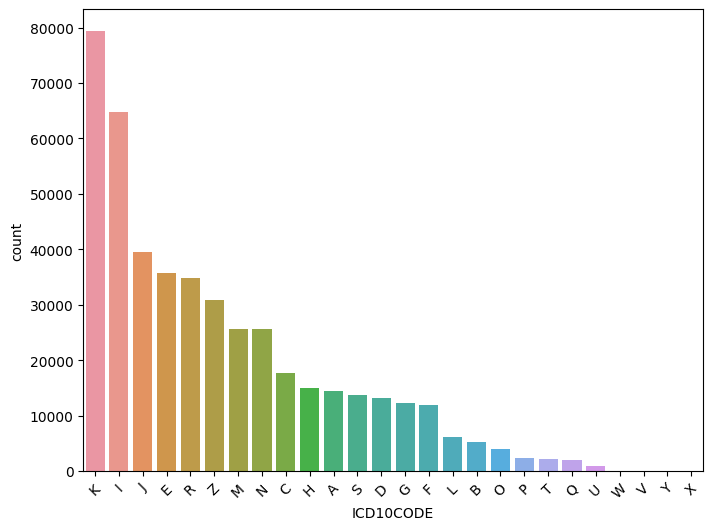

In [5]:
# ICD10코드 앞자리 분석
icd = df_DS.ICD10CD.str[0].value_counts()
icd.index = icd.index.astype(str)


plt.figure(figsize = (8,6))
sns.barplot(x = icd.index, y = icd.values)
plt.xticks(rotation = 45)
plt.xlabel('ICD10CODE')
plt.ylabel('count')
plt.show()

## DIAG_NM 진단명 알아보기

In [6]:
print(len(df_DS.DIAG_NM.unique())) # 모든 유니크 값의 개수
len(df_DS.DIAG_NM.value_counts()[df_DS.DIAG_NM.value_counts() > 1000]) # 값이 1000개 이상인 값의 개수

10577


79

In [29]:
# 진단명 분석: 1000회 이상의 진단을 받은 진단명들의 그래프

# 진단 횟수가 100개 미만인 경우의 총합 = 약 10만 건 (전체 데이터의 약 1/4)
df_DS_copy = df_DS.copy()
x = df_DS_copy.DIAG_NM.value_counts()[df_DS_copy.DIAG_NM.value_counts() < 100]
x.sum()

94647

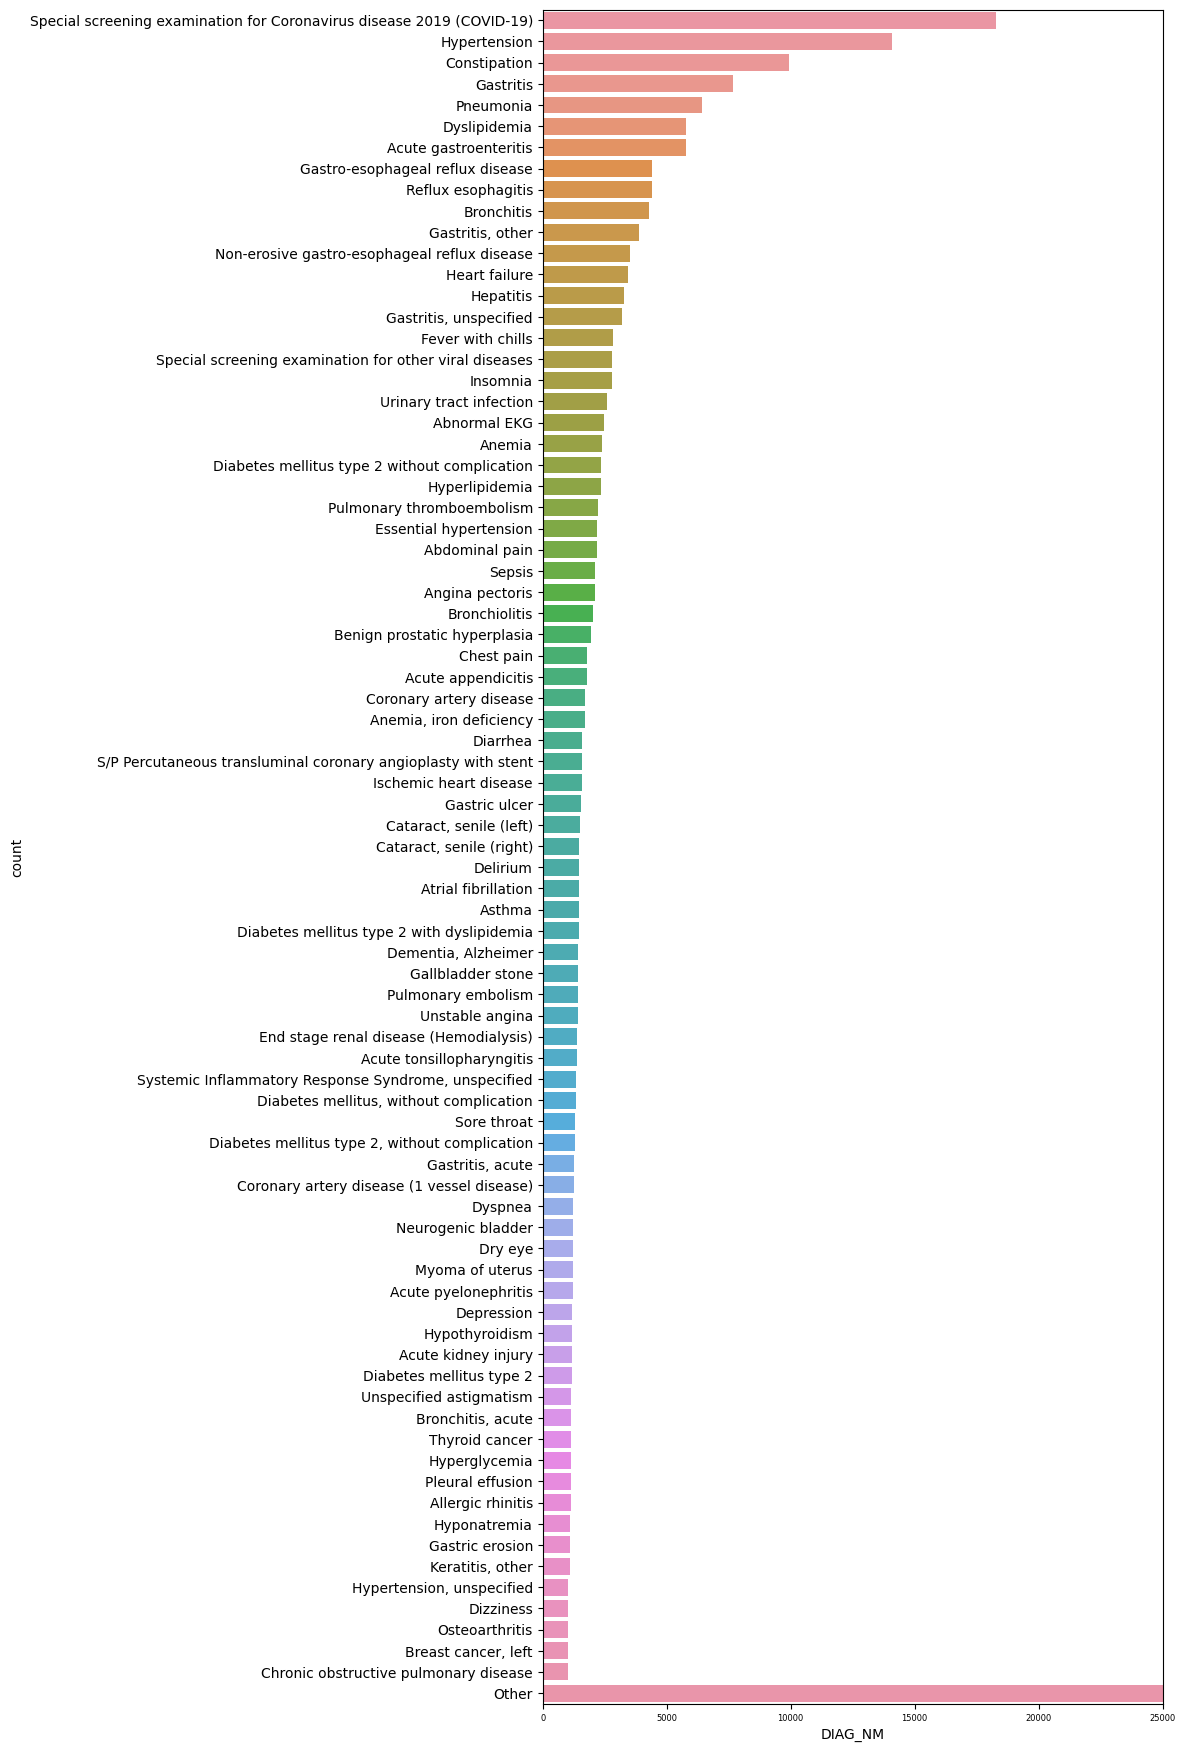

In [48]:
# 1000회 이상의 진단을 받은 진단명들의 그래프

diag = df_DS.DIAG_NM.value_counts()[df_DS.DIAG_NM.value_counts() >= 1000]
diag.loc['Other'] = x.sum()

plt.figure(figsize = (8,22))
sns.barplot(x = diag.values, y = diag.index, orient='h')
plt.xticks(rotation = 0, fontsize = 6)
plt.yticks(rotation = 0)
plt.xlabel('DIAG_NM')
plt.ylabel('count')
plt.xlim(0, 25000)
plt.show()

In [73]:
df_DS.MAIN_DIAG_YN.value_counts()

MAIN_DIAG_YN
N    352074
Y    106187
Name: count, dtype: int64

In [49]:
df_DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458261 entries, 0 to 458260
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   VTHOS_NO      458261 non-null  object
 1   RGNO          458261 non-null  object
 2   ICD10CD       458261 non-null  object
 3   DIAG_NM       458261 non-null  object
 4   MAIN_DIAG_YN  458261 non-null  object
dtypes: object(5)
memory usage: 17.5+ MB


___
# 배양검사결과 EDA

In [40]:
df_INCU = pd.read_csv('./(항생제) 혈액 및 검체 배양검사 결과/TB_YP_INCU_M.csv')

## 데이터 형식 변환

In [41]:
df_INCU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425727 entries, 0 to 425726
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   VTHOS_NO      425727 non-null  object 
 1   RGNO          425727 non-null  object 
 2   PRSC_CD       425727 non-null  int64  
 3   RSLT_INP_YMD  425727 non-null  int64  
 4   SPCM_NM       425727 non-null  object 
 5   EXAM_NM       425727 non-null  object 
 6   SEXAM_NM      425727 non-null  object 
 7   GERM_SEQ      330804 non-null  float64
 8   GERM_NM       424364 non-null  object 
 9   ANTBT_NM      425727 non-null  object 
 10  EXAM_MTH_CD   425727 non-null  object 
 11  RSLT_CONT_CD  425727 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 39.0+ MB


In [42]:
df_INCU.head()

,VTHOS_NO,RGNO,PRSC_CD,RSLT_INP_YMD,SPCM_NM,EXAM_NM,SEXAM_NM,GERM_SEQ,GERM_NM,ANTBT_NM,EXAM_MTH_CD,RSLT_CONT_CD
0,0x451a7165cbb2348d0ed6255c5e913a266a833a4da442...,0xec931a5860e7c6e116f5b566b2aee9f99a80a04f30a9...,20121215,20161228,Sputum1,Bacterial culture,Bacterial culture,NaN,Acinetobacter baumannii/calcoaceticus,Amikacin,Z,S
1,0x451a7165cbb2348d0ed6255c5e913a266a833a4da442...,0xec931a5860e7c6e116f5b566b2aee9f99a80a04f30a9...,20121215,20161228,Sputum1,Bacterial culture,Bacterial culture,NaN,Acinetobacter baumannii/calcoaceticus,Ampicillin/Sulbactam,Z,S
2,0x451a7165cbb2348d0ed6255c5e913a266a833a4da442...,0xec931a5860e7c6e116f5b566b2aee9f99a80a04f30a9...,20121215,20161228,Sputum1,Bacterial culture,Bacterial culture,NaN,Acinetobacter baumannii/calcoaceticus,Ceftazidime,Z,S
3,0x451a7165cbb2348d0ed6255c5e913a266a833a4da442...,0xec931a5860e7c6e116f5b566b2aee9f99a80a04f30a9...,20121215,20161228,Sputum1,Bacterial culture,Bacterial culture,NaN,Acinetobacter baumannii/calcoaceticus,Ciprofloxacin,Z,R
4,0x451a7165cbb2348d0ed6255c5e913a266a833a4da442...,0xec931a5860e7c6e116f5b566b2aee9f99a80a04f30a9...,20121215,20161228,Sputum1,Bacterial culture,Bacterial culture,NaN,Acinetobacter baumannii/calcoaceticus,Gentamicin,Z,R


In [43]:
for i in df_INCU.columns:
    print(i, len(df_INCU[i].unique()))

VTHOS_NO 14937
RGNO 11555
PRSC_CD 3285
RSLT_INP_YMD 16744
SPCM_NM 104
EXAM_NM 5
SEXAM_NM 4
GERM_SEQ 13
GERM_NM 354
ANTBT_NM 74
EXAM_MTH_CD 2
RSLT_CONT_CD 7
